In [2]:
import numpy as np # 导入NumPy库，用于进行线性代数等高级数学运算
import pandas as pd # 导入Pandas库，用于数据处理和读取CSV文件等

import os # 导入os模块，用于处理文件和目录

# 使用os.walk()函数遍历指定目录及其所有子目录
for dirname, _, filenames in os.walk(r'E:\研究生\课程\医学人工智能'):
    # os.walk()返回的是一个三元组(root, dirs, files)
    # dirname 是当前遍历到的文件夹名称（包含其完整路径）
    # _ 是一个占位符，代表当前目录下的子目录名列表，这里不需要使用，故用_忽略
    # filenames 是当前文件夹下的所有文件名列表

    for filename in filenames:
        # 遍历当前目录下的所有文件名

        # 使用os.path.join()函数连接目录名和文件名，得到文件的完整路径
        print(os.path.join(dirname, filename))


E:\研究生\课程\医学人工智能\archive.zip
E:\研究生\课程\医学人工智能\metadata.csv
E:\研究生\课程\医学人工智能\metadata_rgb_only.csv
E:\研究生\课程\医学人工智能\demo.ipynb
E:\研究生\课程\医学人工智能\医学人工智能 第1章.pptx
E:\研究生\课程\医学人工智能\B19080411张新宇.pptx
E:\研究生\课程\医学人工智能\brain tumor.zip
E:\研究生\课程\医学人工智能\案例分析.pptx
E:\研究生\课程\医学人工智能\医学人工智能 第2章.pdf
E:\研究生\课程\医学人工智能\医学人工智能 第1章.pdf
E:\研究生\课程\医学人工智能\1189、人工智能导论（第5版）王万良.pdf
E:\研究生\课程\医学人工智能\人工智能 一种现代的方法.pdf
E:\研究生\课程\医学人工智能\周志华-机器学习-9787302423287.pdf
E:\研究生\课程\医学人工智能\医学人工智能课程PPT\医学人工智能 第2章（上）.pdf
E:\研究生\课程\医学人工智能\医学人工智能课程PPT\医学人工智能 第2章（下）.pdf
E:\研究生\课程\医学人工智能\医学人工智能课程PPT\机器学习应用（总）.pdf
E:\研究生\课程\医学人工智能\医学人工智能课程PPT\第一章 绪论.pdf
E:\研究生\课程\医学人工智能\Brain Tumor Data Set\Brain Tumor Data Set\Brain Tumor\Cancer (1).jpg
E:\研究生\课程\医学人工智能\Brain Tumor Data Set\Brain Tumor Data Set\Brain Tumor\Cancer (1).png
E:\研究生\课程\医学人工智能\Brain Tumor Data Set\Brain Tumor Data Set\Brain Tumor\Cancer (1).tif
E:\研究生\课程\医学人工智能\Brain Tumor Data Set\Brain Tumor Data Set\Brain Tumor\Cancer (10).jpg
E:\研究生\课程\医学人工智能\Brain Tumor Data Set\Bra

In [3]:
import tensorflow as tf
# 导入TensorFlow库，它是一个开源的机器学习库，用于各种感知和语言理解任务。它广泛应用于深度学习模型的构建和训练。

from tensorflow import keras
# 从TensorFlow库中导入Keras。Keras是一个高层神经网络API，它可以在TensorFlow之上运行，提供了一种更简便的方式来定义和训练几乎所有类型的深度学习模型。

from keras.preprocessing.image import ImageDataGenerator
# 从Keras库中导入ImageDataGenerator类。这个类允许你进行图片的实时数据增强，通过对训练图片进行变换（如旋转、缩放、平移等）来增加样本的多样性，从而帮助提高模型的泛化能力。


In [4]:
gen = ImageDataGenerator(
    rescale=1./255,  # rescale参数用于缩放数据。这里将图像像素值从[0, 255]缩放到[0, 1]范围，因为深度学习模型通常在较小的输入值上表现更好。
    validation_split=0.2,  # validation_split参数用于指定一部分数据（这里是20%）作为验证集。这部分数据不会用于训练，而是用于评估模型的性能，帮助调整模型参数。
    zoom_range=(0.99,0.99)  # zoom_range参数用于指定随机缩放的范围。这里设置为(0.99,0.99)，意味着图像在训练时几乎不会被缩放。如果你想在训练过程中引入随机缩放以增加样本多样性，可以设置为更宽的范围，如(0.5, 1.5)。
)


In [10]:
train = gen.flow_from_directory(
    "Brain Tumor Data Set/Brain Tumor Data Set/",  # 指定图像数据的目录。这里假设您的数据按类别存储在子目录中。
    target_size=(150, 150),  # target_size指定在读取图像时应调整图像的大小。这里将所有图像的大小统一调整为150x150。
    batch_size=256,  # batch_size指定每个批次的图像数量。这里每个批次包含256个图像。
    class_mode="binary",  # class_mode指定分类类型。"binary"表示二分类问题，适用于存在/不存在脑肿瘤这样的场景。
    color_mode="rgb",  # color_mode指定图像颜色模式。"rgb"表示图像将被读取为三通道彩色图像。
    shuffle=True,  # shuffle指定是否在每个训练周期开始时随机打乱数据。这有助于模型泛化能力的提升。
    seed=123,  # seed提供一个随机种子以确保数据的可重复性。
    subset="training",  # subset指定从数据生成器返回的数据子集。这里使用"training"表示该生成器用于训练数据。
)


Found 3681 images belonging to 2 classes.


In [11]:
val = gen.flow_from_directory(
    "Brain Tumor Data Set/Brain Tumor Data Set/",  # 指定图像数据的目录，与训练集相同，假设数据按类别存储在子目录中。
    target_size=(150, 150),  # 指定读取图像时调整图像的大小为150x150。
    batch_size=8,  # batch_size这里设置为8，意味着每个批次包含8个图像。对于验证集，较小的批量大小有助于减少内存消耗，同时足以获得模型性能的可靠估计。
    class_mode="binary",  # class_mode设置为"binary"，适用于二分类问题。
    color_mode="rgb",  # color_mode指定图像将被读取为三通道彩色图像。
    shuffle=True,  # shuffle指定在每个训练周期开始时随机打乱数据，即使是验证集也应该这样做，以保证数据的随机性。
    seed=123,  # seed提供一个随机种子，以确保数据可重复性。
    subset="validation"  # subset指定从数据生成器返回的数据子集为"validation"，表明该生成器用于验证数据。
)

classes = val.class_indices
# class_indices属性保存了从类别名称到类别索引的映射，这对于理解模型预测的输出非常有用。


Found 919 images belonging to 2 classes.


In [6]:
classes

{'Brain Tumor': 0, 'Healthy': 1}

In [7]:
import seaborn as sns
# 导入Seaborn库，通常简写为sns。Seaborn提供了一系列设计美观、信息丰富的统计图形选项。


<AxesSubplot: >

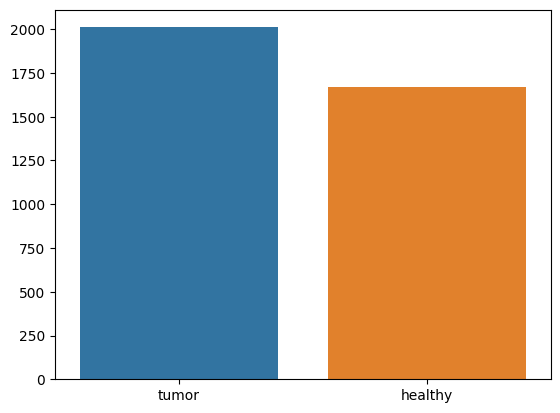

In [13]:
t=0  # 初始化变量t，用于计数没有肿瘤（即标签为0）的样本数量。
h=0  # 初始化变量h，用于计数有肿瘤（即标签为1）的样本数量。

for i in range(15):
    # 遍历15个批次的数据。
    a, b = next(train)
    # 使用next函数从train数据生成器中获取下一批数据。a包含图像数据，b包含对应的标签（0或1）。

    for j in b:
        # 遍历当前批次中所有样本的标签。
        if j == 1:
            h+=1  # 如果标签为1（表示有肿瘤），则增加h的计数。
        else:
            t+=1  # 如果标签为0（表示没有肿瘤），则增加t的计数。

# 使用Seaborn的barplot函数绘制条形图，展示肿瘤和健康样本的数量。
sns.barplot(x=['tumor','healthy'],y=[t,h])


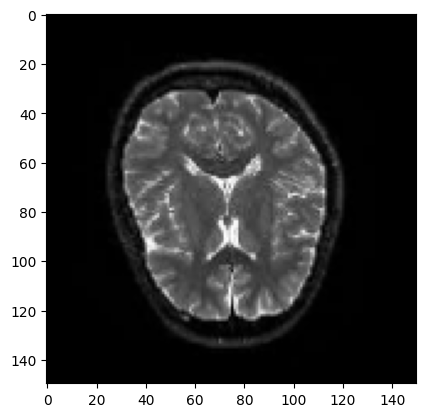

In [14]:
import matplotlib.pyplot as plt
# 导入Matplotlib的pyplot模块，通常简写为plt。Matplotlib是Python的一个绘图库，提供了大量绘图方法，是数据可视化的常用工具。

batch = next(train)
# 使用next函数从train数据生成器中获取下一个批次的数据。这个批次的数据包括图像和相应的标签，其中batch[0]包含图像数据，batch[1]包含标签数据。

plt.imshow(batch[0][0])
# 使用plt.imshow方法显示这个批次中的第一个图像。batch[0][0]访问的是图像数据的第一项，即批次中的第一个图像。
# imshow是Matplotlib中用于显示图像的函数。这里它被用来显示经过预处理（如归一化等）后的图像数据。

plt.show()
# 调用plt.show()来显示图像。在某些环境中，如果不调用plt.show()，图像可能不会被立即渲染显示出来。这行代码确保图像被渲染并显示在一个窗口中。


In [15]:
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
# 导入Keras的层类，用于构建神经网络：
# - Conv2D：二维卷积层，用于处理图像等二维数据。
# - MaxPool2D：二维最大池化层，用于降低特征图的维度，提取重要特征。
# - LeakyReLU：Leaky Rectified Linear Unit激活函数，一种改进的ReLU，允许小的梯度当输入为负时流过，避免了ReLU的死亡神经元问题。
# - BatchNormalization：批量归一化层，用于加速训练过程，提高模型稳定性。
# - Dropout：Dropout层，用于减少模型过拟合，通过在训练过程中随机“丢弃”一些神经元的激活。
# - Dense：全连接层，每个神经元与前一层的每个神经元都连接。
# - InputLayer：输入层，用于指定模型输入的形状。
# - Flatten：平坦化层，将多维的输入一维化，常用于卷积层到全连接层的过渡。

from keras.losses import BinaryCrossentropy
# 导入BinaryCrossentropy类，它是一个损失函数，用于二分类问题，计算模型预测和真实标签之间的交叉熵损失。

from keras.optimizers import Adam
# 导入Adam优化器，它是一种基于梯度下降的优化算法，通过调整模型参数来最小化损失函数，特别适用于大规模数据和参数的深度学习模型。


In [16]:
model = keras.Sequential()
# 初始化一个Sequential模型，这是Keras中一种简单的线性堆叠模型结构。

model.add(InputLayer(input_shape=(150,150,3)))
# 添加输入层，指定输入数据的形状为(150, 150, 3)，适用于150x150像素的RGB图像。

model.add(Conv2D(filters=32, kernel_size=3, activation="relu", padding="same"))
# 添加第一个卷积层，有32个过滤器，每个过滤器的大小为3x3。使用ReLU激活函数和"same"填充策略（输入和输出尺寸相同）。

model.add(MaxPool2D())
# 添加第一个最大池化层，使用默认的池化窗口大小2x2，减少特征图的维度。

model.add(Conv2D(filters=64, kernel_size=3, activation="relu", padding="same"))
# 添加第二个卷积层，有64个过滤器，增加网络的深度以捕捉更复杂的特征。

model.add(MaxPool2D())
# 添加第二个最大池化层，进一步减少特征图的维度。

model.add(Flatten())
# 添加平坦化层，将多维的卷积层输出展平成一维，以便输入到全连接层。

model.add(Dense(128, activation='relu'))
# 添加第一个全连接层，有128个神经元，并使用ReLU激活函数。

model.add(BatchNormalization())
# 添加批量归一化层，帮助模型训练更稳定、更快。

model.add(Dropout(rate=0.3))
# 添加Dropout层，丢弃率为30%，减少过拟合。

model.add(Dense(64, activation="relu"))
# 添加第二个全连接层，有64个神经元。

model.add(BatchNormalization())
# 再次添加批量归一化层。

model.add(Dropout(rate=0.3))
# 再次添加Dropout层，丢弃率为30%。

model.add(Dense(1, activation="sigmoid"))
# 添加输出层，有1个神经元，使用sigmoid激活函数，适用于二分类任务输出。

model.compile(optimizer=Adam(0.001), loss=BinaryCrossentropy(), metrics=['accuracy'])
# 编译模型，使用Adam优化器（学习率为0.001），损失函数为二元交叉熵，评估指标为准确率。


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [19]:
from keras import utils, callbacks
# 从keras模块导入utils和callbacks。callbacks模块包含了许多用于在训练过程中调整模型行为的工具。

earlystopping = callbacks.EarlyStopping(
    monitor="val_loss",  # monitor参数指定了需要监视的数据。在这里，我们监视验证集的损失（val_loss）。
    mode="min",  # mode参数决定了改善的方向。"min"意味着监视的数据越小越好，适用于损失。
    patience=5,  # patience参数指定了在停止前允许监视的数据没有改善的轮数。这里设置为5，意味着在验证集损失连续5个epoch没有改善时，训练将被停止。
    restore_best_weights=True  # restore_best_weights参数为True时，训练结束后模型的权重将被恢复到监视数据最好时的权重。这确保了模型具有在验证集上表现最好的权重。
)


In [20]:
history = model.fit(
    train,  # train是之前定义的训练数据生成器，它将不断生成批量的图像和标签用于训练。
    verbose=1,  # verbose参数控制训练过程中信息的显示类型。1表示以进度条的形式显示。
    callbacks=[earlystopping],  # callbacks参数接收一个回调函数列表，在训练过程中会调用这些函数。这里使用了早停回调。
    epochs=20,  # epochs参数指定训练模型的总轮数（epoch）。这里设置为20轮，但由于早停回调的存在，实际可能不会运行所有轮次。
    validation_data=val  # validation_data参数接收验证数据集。这里使用了之前定义的验证数据生成器val。
)


Epoch 1/20
15/15 [==============================] - 102s 6s/step - loss: 0.6140 - accuracy: 0.6933 - val_loss: 1.4198 - val_accuracy: 0.6311
Epoch 2/20
15/15 [==============================] - 73s 5s/step - loss: 0.3648 - accuracy: 0.8324 - val_loss: 0.3473 - val_accuracy: 0.8727
Epoch 3/20
15/15 [==============================] - 74s 5s/step - loss: 0.2155 - accuracy: 0.9228 - val_loss: 0.2642 - val_accuracy: 0.8966
Epoch 4/20
15/15 [==============================] - 59s 4s/step - loss: 0.1410 - accuracy: 0.9552 - val_loss: 0.2375 - val_accuracy: 0.9129
Epoch 5/20
15/15 [==============================] - 52s 3s/step - loss: 0.0881 - accuracy: 0.9766 - val_loss: 0.1959 - val_accuracy: 0.9391
Epoch 6/20
15/15 [==============================] - 90s 6s/step - loss: 0.0530 - accuracy: 0.9889 - val_loss: 0.1325 - val_accuracy: 0.9946
Epoch 7/20
15/15 [==============================] - 83s 6s/step - loss: 0.0344 - accuracy: 0.9948 - val_loss: 0.2063 - val_accuracy: 0.9053
Epoch 8/20
15/15 [=

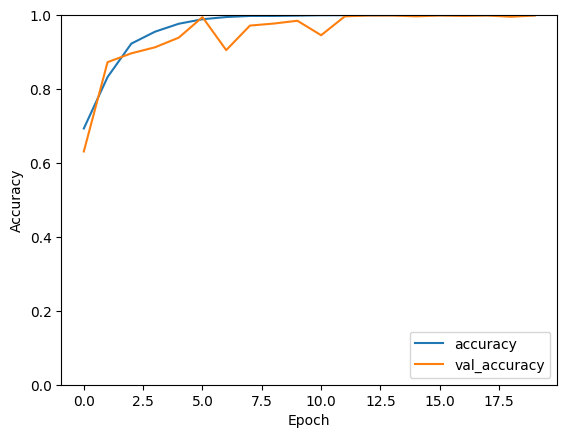

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

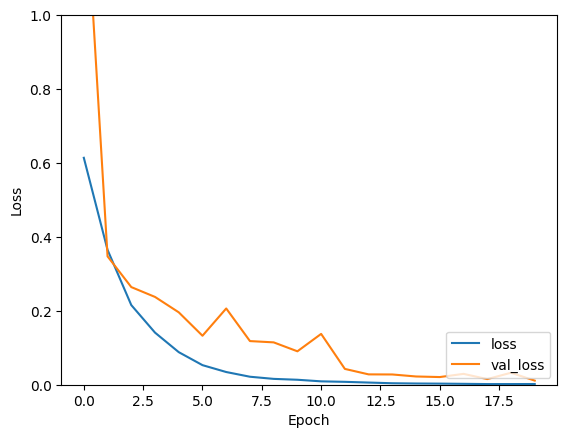

In [22]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')